(c) 2016 - present, Enplus Advisors, Inc.

In [1]:
import numpy as np
import pandas as pd

from IPython.display import Image

pd.set_option('precision', 2)

def image(name, **kwargs):
    return Image(filename=f'assets/{name}', retina=True, **kwargs)

In [2]:
%%html

<style>
.output_png {
    display: flex;
    justify-content: left;
}
</style>


# Programming with Data<br>Foundations of Python and Pandas

# Lesson 1: Series

## Download slides and exercises

View pre-rendered notebooks at
```
github.com/dgerlanc/programming-with-data
```

Clone the `git` repo by running
```
git clone https://github.com/dgerlanc/programming-with-data
```

Goals:

* pandas has a huge API
* Our goal is to distill some wisdom about python

## Pandas

Expansive library with a huge API.

Distill some `pandas` wisdom.

I try to present a conceptual approach to "Programming with Data",
starting with primitive data types and working up from there.

I like to think about Series in two primary ways (on next slide):


## What is a `Series`?

Series is the building block of `pandas`.

Two ways I conceptualize them...

### Ordered key-value pairs with homogenous data type


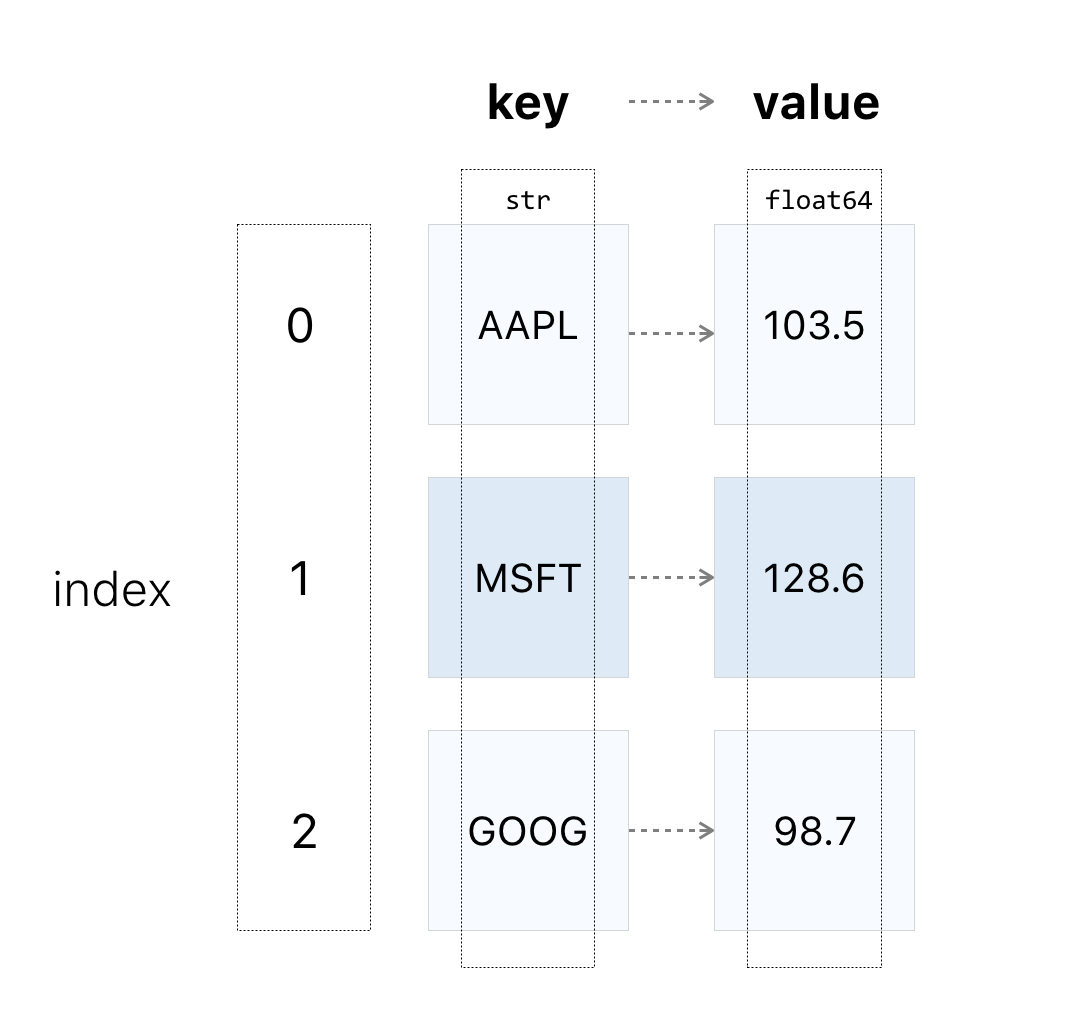

In [3]:
image('lesson-01-key-value.png')

### A label array and a data array

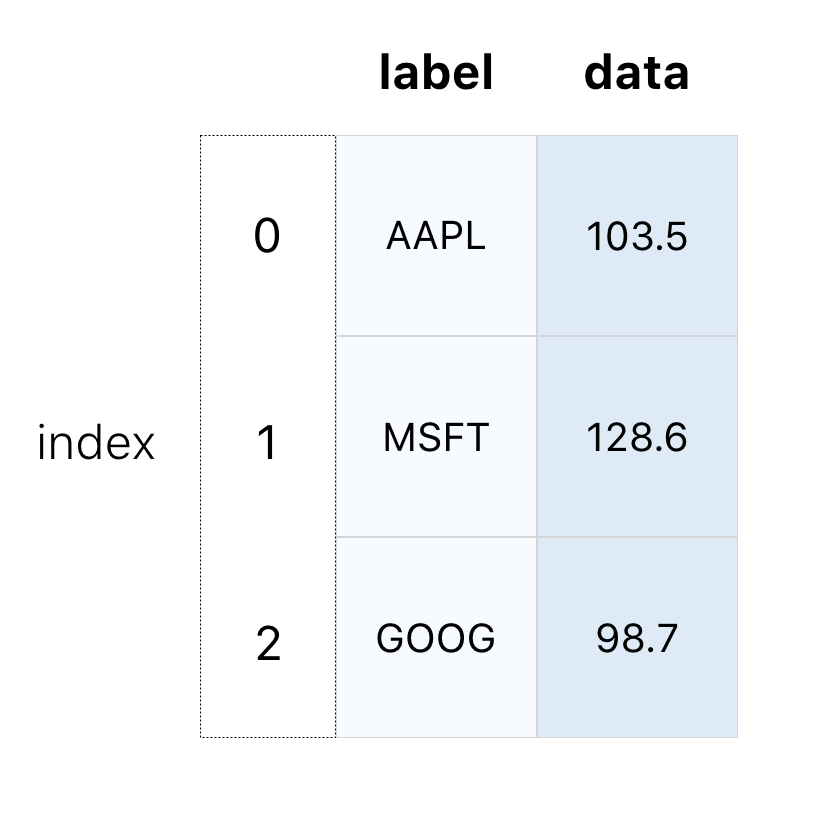

In [4]:
image('data-label-arrays.png')

## Create a simple `Series`

* These are the standard imports we'll assume.
* Let's create a Series.

In [5]:
import numpy as np
import pandas as pd

s = pd.Series([6, 8, 7, 5])
s

0    6
1    8
2    7
3    5
dtype: int64

`dtype` is the `Series` datatype. Corresponds to the `numpy` dtype (mostly).

More information on `numpy` data types [here](https://numpy.org/doc/stable/reference/arrays.dtypes.html).

### Convert to another `numpy` dtype

A benefit of having `numpy` imported is that you can convert to
any `numpy` type (as long as the operation is defined).

In [6]:
s

0    6
1    8
2    7
3    5
dtype: int64

In [7]:
s.astype(np.float64)

0    6.0
1    8.0
2    7.0
3    5.0
dtype: float64

## Series from a `pandas` perspective

In `pandas`:
* the keys/labels are called the `index`
* The data are the `values`


Note: The `index` is not required to be unique but some operations are not supported
if there are duplicates, e.g., unstacking

This is important because the index determines alignment of pandas
objects, as we will see shortly.

### Series - Implicit Index

In [8]:
s = pd.Series([6, 8, 7, 5])

In [9]:
s.index

RangeIndex(start=0, stop=4, step=1)

If you don't provide explicit labels you get increasing integer labels.

In [10]:
s.array

<PandasArray>
[6, 8, 7, 5]
Length: 4, dtype: int64

`s.array` is a `numpy` compatible array

### Series - Explicit Index

In [11]:
s1 = pd.Series([8, 6, 7, 5], index=['b', 'd', 'c', 'a'])
s1

b    8
d    6
c    7
a    5
dtype: int64

In [12]:
s1.index

Index(['b', 'd', 'c', 'a'], dtype='object')

Now we have a new kind of `Index`, but the values stay the same.

In [13]:
s1.array # pandas > 0.24.0

<PandasArray>
[8, 6, 7, 5]
Length: 4, dtype: int64

## Series from `dict`

Can also create a series from a `dict`.

`dict`s preserve insertion order since Python 3.6 so you can no longer
rely on `pandas` automatically sorting the index

In [14]:
s2 = pd.Series({'b': 8, 'd': 6, 'c': 7, 'a': 5})
s2

b    8
d    6
c    7
a    5
dtype: int64

### Pre-Python 3.6 `index` sorting

In [15]:
s2.sort_index()

a    5
b    8
c    7
d    6
dtype: int64

## Selecting from a `Series`

* Select by position: `iloc`
* Select by label: `loc`
* Let `pandas` decide if label or position

### Selection by position

In [16]:
s2

b    8
d    6
c    7
a    5
dtype: int64

In [17]:
s2.iloc[0]

8

In [18]:
# shortcut method
s2[0]

8

### Selection by label

In [19]:
s2

b    8
d    6
c    7
a    5
dtype: int64

In [20]:
s2.loc['a'] 

5

In [21]:
# shortcut method
s2['a']

5

## So why do we need `pandas`?

* Vectorization
* Missing Data
* Alignment

## Vectorization

__Definition__: Applying a single operation to multiple data elements

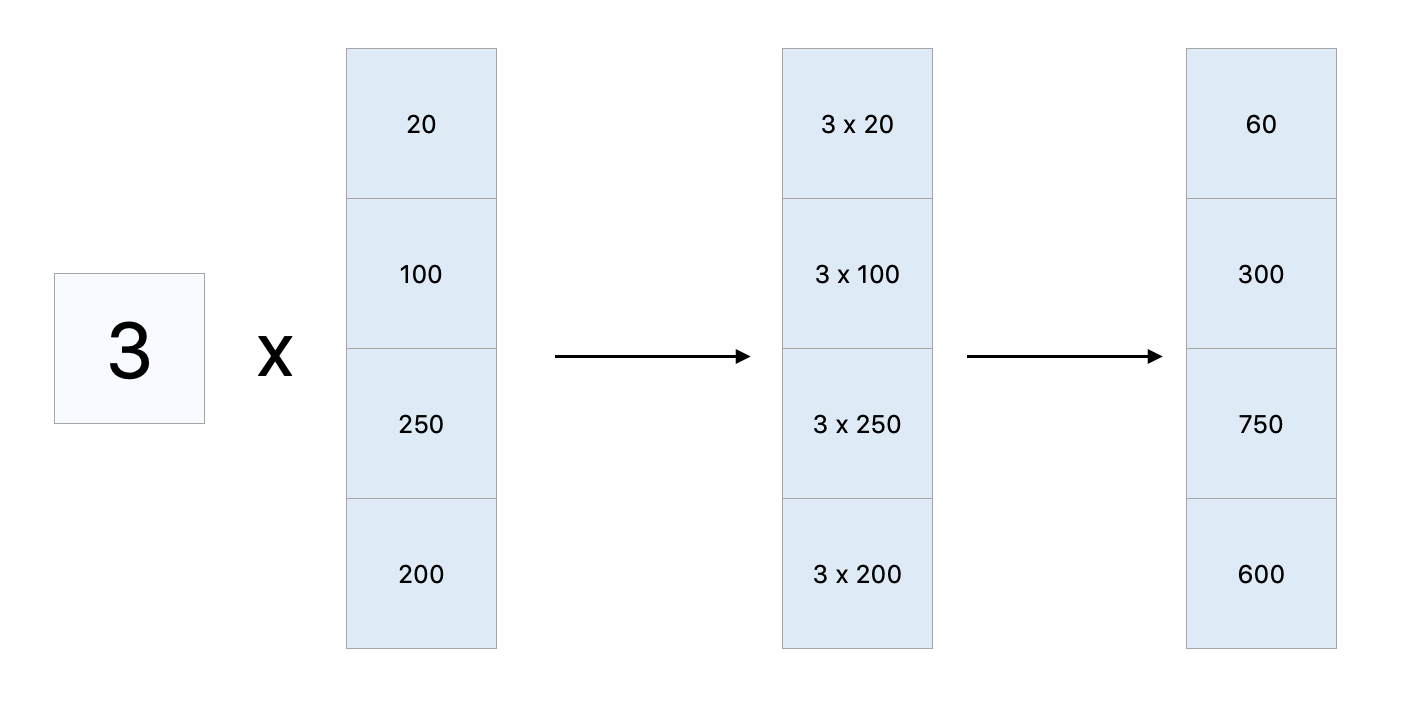

In [22]:
image('vectorized-multiplication.png')

### Most operations in `pandas` are vectorized

In [23]:
3 * s2

b    24
d    18
c    21
a    15
dtype: int64

* Vectorization provides implicit iteration.
* Would need to write a loop in base `Python`

`pandas` preserves the `index` in the result

### Vectorized selection

In [24]:
s2

b    8
d    6
c    7
a    5
dtype: int64

In [25]:
s2.loc[['a', 'c']] # s3[['a', 'c']]

a    5
c    7
dtype: int64

Note how selection operations preserve the `index`.

## Query a `Series`

Use query operations to _search_ for elements that satisfy one or more conditions.

In [26]:
idx = s2 > 5
idx

b     True
d     True
c     True
a    False
dtype: bool

In [27]:
# Selecting with a boolean vector
s2[idx]

b    8
d    6
c    7
dtype: int64

### Query with compound statements

In [28]:
idx = (6 < s2) & (s2 < 100)
idx

b     True
d    False
c     True
a    False
dtype: bool

`&` binds more tightly than comparison operators so you need parentheses.

### Query missing data

In [29]:
s3 = pd.Series([6., 8., np.nan, 7.])
s3

0    6.0
1    8.0
2    NaN
3    7.0
dtype: float64

In [30]:
s3.isnull() # method

0    False
1    False
2     True
3    False
dtype: bool

In [31]:
s3[pd.notnull(s3)] # function

0    6.0
1    8.0
3    7.0
dtype: float64

Note the preservation of labels (index)

## Types of Missing Data

What is the `dtype` of `s4`?

In [32]:
s4 = pd.Series([1, 2, np.nan, 5], index=list('abcd'))

In [33]:
s4

a    1.0
b    2.0
c    NaN
d    5.0
dtype: float64

__WARNING__: There is no integer NA type in `pandas < 0.24.0`

###  Missingness in modern `pandas`

* `pandas` supports missing data using extension types in version > 0.24
* Allows you to have integers (and other non-`object` types) with missing values

In [34]:
s4m = pd.Series([1, 2, np.nan, 5], index=list('abcd'), dtype='Int64')
s4m

a       1
b       2
c    <NA>
d       5
dtype: Int64

## Introducing alignment 

Operations in `pandas` are implicitly aligned by index!

In [35]:
s5 = pd.Series([6, 8, 7], index=list('abc'))
s6 = pd.Series([1, 2, 3, 4], index=list('abcd'), dtype='Int64')

In [36]:
s5 + s6

a     7.0
b    10.0
c    10.0
d     NaN
dtype: float64

Note that the "NA-ness" of `s6` does not propagate to the result!

For consistent behavior, all `Series` must opt in to the NA-enabled extension types.